## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Assignment 3: Bancassurance</span>

&nbsp;

<p align="center" style="font-family: Arial;color:#0e92ea;font-size:1em;">
Build a model to identify the positively responding customers who have a higher probability of purchasing the insurance
    
</p>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Contents:</span>

<ol style="font-family: Arial;color:#0e92ea;font-size:1em;">
    <li>Data Overview and EDA</li>
    <li>Outlier Treatment and Feature Engineering</li>
    <li>Building Decision Tree Model and Analysis</li>
    <li>Building Logistic Regression Model and Analysis</li>
    <li>Conclusions</li>
</ol>

In [1]:
import os
import warnings
import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from datetime import datetime
from matplotlib import gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from os import system
from IPython.display import Image


warnings.filterwarnings('ignore')

main_data = pd.read_csv('My Bank.csv')

default_color_palette  = ["#03A9F4","#7C4DFF", "#FF5252", "#D50000", "#FF6F00", "#0288D1", "#7C4DFF"] 
stats_colors           = {'Mean':'#D50000', 'Mode':'#FF3D00', 'Median':'#2962FF'} # Set standard colors for mean, mode and median to use accross entire notebook.
gender_color_palette   = {"Female":"#E91E63", "Male":"#42A5F5"} # Gender based colors.

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 1. Data Overview and EDA:
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> General Observations:
<ul>
    <li>The data has no mising values.</li>
</ul>

In [2]:
main_data.head(10)

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,...,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,C7927,0,27,M,3383.75,SELF-EMP,776,30,SA,3/23/2005,...,0,0,13100,0,0,973557.0,0,0,1,1
1,C6877,0,47,M,287489.04,SAL,324,28,SA,10-11-2008,...,0,0,6600,0,0,799813.0,0,1,1,0
2,C19922,0,40,M,18216.88,SELF-EMP,603,2,SA,4/26/2012,...,2,0,11200,561120,49320,997570.0,0,1,1,1
3,C8183,0,53,M,71720.48,SAL,196,13,CA,07-04-2008,...,4,0,26100,673590,60780,741506.0,71388,0,1,0
4,C12123,0,36,M,1671622.89,PROF,167,24,SA,12/29/2001,...,0,0,0,808480,0,0.0,0,0,1,0
5,C257,0,42,F,521685.69,PROF,493,26,SA,06-07-2001,...,0,1,18500,379310,0,0.0,0,0,1,1
6,C8300,0,30,M,204458.60,PROF,479,14,SA,8/25/2002,...,4,0,6200,0,10580,770065.0,0,1,0,1
7,C5999,0,53,F,58516.34,SAL,562,25,CA,3/15/2009,...,0,0,0,945160,0,0.0,0,0,1,1
8,C5692,0,42,F,13158.14,SELF-EMP,105,15,SA,02-08-2010,...,1,1,35400,198430,51490,326421.0,170332,0,1,1
9,C3241,0,30,M,831150.18,PROF,170,13,SA,03-02-2008,...,4,0,18000,869880,32610,0.0,0,0,0,0


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Drop CUST_ID:
<ul>
    <li>Drop the customer id to avoid having it make each column unique.</li>
</ul>

In [3]:
main_data.drop("CUST_ID", axis=1, inplace=True)
main_data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TARGET                    20000 non-null  int64  
 1   AGE                       20000 non-null  int64  
 2   GENDER                    20000 non-null  object 
 3   BALANCE                   20000 non-null  float64
 4   OCCUPATION                20000 non-null  object 
 5   SCR                       20000 non-null  int64  
 6   HOLDING_PERIOD            20000 non-null  int64  
 7   ACC_TYPE                  20000 non-null  object 
 8   ACC_OP_DATE               20000 non-null  object 
 9   LEN_OF_RLTN_IN_MNTH       20000 non-null  int64  
 10  NO_OF_L_CR_TXNS           20000 non-null  int64  
 11  NO_OF_BR_CSH_WDL_DR_TXNS  20000 non-null  int64  
 12  NO_OF_ATM_DR_TXNS         20000 non-null  int64  
 13  NO_OF_NET_DR_TXNS         20000 non-null  int64  
 14  NO_OF_

In [4]:
'''
Input:
Pandas DataFrame

Output:
Displays DataFrame structure 
(columns, nulls and non nulls counts and percentage highlighing columns with most number of nulls)

Retunrs:
N/A
'''
def info(dataFrame):
    print(f"{dataFrame.shape[0]} Rows x {dataFrame.shape[1]} Columns")
    nulls_series             = dataFrame.isna().sum()         # Get a series counting number of empty values for each column
    nonnulls_series          = dataFrame.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
    nulls_percentage         = ((nulls_series * 100)/(nulls_series + nonnulls_series)).astype(float)
    column_datatypes         = dataFrame.dtypes               # Get a series containing data types for each column 

    nulls_count_df = pd.concat(
        [nulls_series, nonnulls_series, nulls_percentage, column_datatypes],
        axis=1,
        keys=["Nulls", "Non-Nulls","Nulls %", "Type"], 
        sort=True)
    cm = sns.light_palette("red", as_cmap=True)
    display(nulls_count_df.style.background_gradient(cmap=cm, subset=pd.IndexSlice[:, ['Nulls %']]).format(formatter={('Nulls %'): "{:.2f}%"}))    

In [5]:
info(main_data)

20000 Rows x 25 Columns


,Nulls,Non-Nulls,Nulls %,Type
ACC_OP_DATE,0,20000,0.00%,object
ACC_TYPE,0,20000,0.00%,object
AGE,0,20000,0.00%,int64
AMT_ATM_DR,0,20000,0.00%,int64
AMT_BR_CSH_WDL_DR,0,20000,0.00%,int64
AMT_CHQ_DR,0,20000,0.00%,int64
AMT_MOB_DR,0,20000,0.00%,int64
AMT_NET_DR,0,20000,0.00%,float64
BALANCE,0,20000,0.00%,float64
FLG_HAS_ANY_CHGS,0,20000,0.00%,int64


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Fixing Types:
<ul>
    <li>All features with 'object' as type are categorial features except for the <b>ACC_OP_DATE</b> which is of type DateTime.</li>
    <li>All features with type object are converted to type category except for <b>ACC_OP_DATE</b> which is converted to type datetime and the <b>TARGET</b> feature which is left as type int.</li>
    <li>Other features that are converted to type category are all other features with unique values that are less than five (works for the features in this dataset as the fatures pulled by this query are flags which are expected to have small limited number of unique items)</li>
</ul>

In [6]:
main_data[main_data.select_dtypes(include=['object']).columns.tolist()].head(10)

,GENDER,OCCUPATION,ACC_TYPE,ACC_OP_DATE
0,M,SELF-EMP,SA,3/23/2005
1,M,SAL,SA,10-11-2008
2,M,SELF-EMP,SA,4/26/2012
3,M,SAL,CA,07-04-2008
4,M,PROF,SA,12/29/2001
5,F,PROF,SA,06-07-2001
6,M,PROF,SA,8/25/2002
7,F,SAL,CA,3/15/2009
8,F,SELF-EMP,SA,02-08-2010
9,M,PROF,SA,03-02-2008


In [7]:
# pull out all features with less than or equal to five unique values
to_category_features = main_data.nunique()[main_data.nunique().values <= 5].index.values
main_data.nunique()[main_data.nunique().values <= 5].head(10)

TARGET              2
GENDER              3
OCCUPATION          4
ACC_TYPE            2
FLG_HAS_CC          2
FLG_HAS_ANY_CHGS    2
FLG_HAS_NOMINEE     2
FLG_HAS_OLD_LOAN    2
dtype: int64

In [8]:
# Explore types for the features pulled in the previous step
main_data[main_data.nunique()[main_data.nunique().values <= 5].index.to_list()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TARGET            20000 non-null  int64 
 1   GENDER            20000 non-null  object
 2   OCCUPATION        20000 non-null  object
 3   ACC_TYPE          20000 non-null  object
 4   FLG_HAS_CC        20000 non-null  int64 
 5   FLG_HAS_ANY_CHGS  20000 non-null  int64 
 6   FLG_HAS_NOMINEE   20000 non-null  int64 
 7   FLG_HAS_OLD_LOAN  20000 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.2+ MB


In [9]:
'''
Input:
Target type and a list of feature names.

Output:
Convert all features provided in 'column_names' to Target type provided in 'toType'

Returns:
modifies main original data frame and returns nothing.
'''
def ConvertColTo(toType, column_names=np.nan, df = np.nan):
    for col_name in column_names:
        if col_name != 'TARGET':
            if df != df:
                main_data[col_name] = main_data[col_name].astype(toType)
            else:
                df[col_name] = df[col_name].astype(toType)

ConvertColTo("category", to_category_features)
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   TARGET                    20000 non-null  int64   
 1   AGE                       20000 non-null  int64   
 2   GENDER                    20000 non-null  category
 3   BALANCE                   20000 non-null  float64 
 4   OCCUPATION                20000 non-null  category
 5   SCR                       20000 non-null  int64   
 6   HOLDING_PERIOD            20000 non-null  int64   
 7   ACC_TYPE                  20000 non-null  category
 8   ACC_OP_DATE               20000 non-null  object  
 9   LEN_OF_RLTN_IN_MNTH       20000 non-null  int64   
 10  NO_OF_L_CR_TXNS           20000 non-null  int64   
 11  NO_OF_BR_CSH_WDL_DR_TXNS  20000 non-null  int64   
 12  NO_OF_ATM_DR_TXNS         20000 non-null  int64   
 13  NO_OF_NET_DR_TXNS         20000 non-null  int6

In [10]:
main_data['ACC_OP_DATE'] = pd.to_datetime(main_data['ACC_OP_DATE'])
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TARGET                    20000 non-null  int64         
 1   AGE                       20000 non-null  int64         
 2   GENDER                    20000 non-null  category      
 3   BALANCE                   20000 non-null  float64       
 4   OCCUPATION                20000 non-null  category      
 5   SCR                       20000 non-null  int64         
 6   HOLDING_PERIOD            20000 non-null  int64         
 7   ACC_TYPE                  20000 non-null  category      
 8   ACC_OP_DATE               20000 non-null  datetime64[ns]
 9   LEN_OF_RLTN_IN_MNTH       20000 non-null  int64         
 10  NO_OF_L_CR_TXNS           20000 non-null  int64         
 11  NO_OF_BR_CSH_WDL_DR_TXNS  20000 non-null  int64         
 12  NO_OF_ATM_DR_TXNS 

In [11]:
main_data.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,20000.0,0.125600,0.331406,0.0,0.000,0.000,0.00,1.00
AGE,20000.0,38.418150,9.577985,21.0,30.000,38.000,46.00,55.00
BALANCE,20000.0,511362.192118,723592.961792,0.0,64754.025,231675.845,653876.85,8360430.57
SCR,20000.0,440.150300,249.887582,100.0,227.000,364.000,644.00,999.00
HOLDING_PERIOD,20000.0,14.955650,8.642634,1.0,7.000,15.000,22.00,31.00
LEN_OF_RLTN_IN_MNTH,20000.0,125.239300,54.953936,29.0,79.000,125.000,172.00,221.00
NO_OF_L_CR_TXNS,20000.0,12.348050,12.151921,0.0,6.000,10.000,14.00,75.00
NO_OF_BR_CSH_WDL_DR_TXNS,20000.0,1.883000,2.263596,0.0,1.000,1.000,2.00,15.00
NO_OF_ATM_DR_TXNS,20000.0,1.028950,1.497239,0.0,0.000,1.000,1.00,25.00
NO_OF_NET_DR_TXNS,20000.0,1.172450,2.404246,0.0,0.000,0.000,1.00,22.00


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Explore Unique Values and Drop Duplicates:
<ul>
    <li>
        The data looks very imbalanced except for the 'FLG_HAS_OLD_LOAN' feature. This is more likely to cause the model to be baised (overfit) toward the majority.
    </li>
    <li>
        The data has only 12.56% records of customers who bought the insurance and given that this is the prediction/value we want to get right, it will be very difficult with the data basiased toward customers who did not buy the insurance. 
    </li>
    <li>
        Delete duplicates of the data where 'TARGET' is equal to Zero '0' to try to balance out the data more.
    </li>
</ul>

In [12]:
'''
Input:
N/A

Output:
Go through each categorial column and print unique values for that column.

Retunrs:
N/A
'''
def CountUniqueValues(col_names):
    for col_name in col_names:
        print(f"======================='{col_name}'==================")
        for unique_col_value in  main_data[col_name].unique().tolist():
            total_count = main_data[col_name].count()
            unique_values_count = main_data[main_data[col_name] == unique_col_value][col_name].count()
            percentage = str(round((unique_values_count/total_count) * 100, 2))
            print(f"{unique_col_value} \t: {unique_values_count} ({percentage}%)")
        print(f"=========================================================\n")

catgry_col_names = main_data.select_dtypes(include=['category']).columns.tolist()
CountUniqueValues(catgry_col_names)
CountUniqueValues(['TARGET'])

======================='GENDER'==================
M 	: 14376 (71.88%)
F 	: 5433 (27.16%)
O 	: 191 (0.96%)

======================='OCCUPATION'==================
SELF-EMP 	: 3568 (17.84%)
SAL 	: 5855 (29.28%)
PROF 	: 5417 (27.08%)
SENP 	: 5160 (25.8%)

======================='ACC_TYPE'==================
SA 	: 15759 (78.8%)
CA 	: 4241 (21.2%)

======================='FLG_HAS_CC'==================
0 	: 13892 (69.46%)
1 	: 6108 (30.54%)

======================='FLG_HAS_ANY_CHGS'==================
0 	: 17788 (88.94%)
1 	: 2212 (11.06%)

======================='FLG_HAS_NOMINEE'==================
1 	: 18023 (90.12%)
0 	: 1977 (9.88%)

======================='FLG_HAS_OLD_LOAN'==================
1 	: 9859 (49.3%)
0 	: 10141 (50.7%)

======================='TARGET'==================
0 	: 17488 (87.44%)
1 	: 2512 (12.56%)



In [13]:
main_data.nunique()

TARGET                         2
AGE                           35
GENDER                         3
BALANCE                     9924
OCCUPATION                     4
SCR                          896
HOLDING_PERIOD                31
ACC_TYPE                       2
ACC_OP_DATE                 4869
LEN_OF_RLTN_IN_MNTH          193
NO_OF_L_CR_TXNS               76
NO_OF_BR_CSH_WDL_DR_TXNS      16
NO_OF_ATM_DR_TXNS             26
NO_OF_NET_DR_TXNS             17
NO_OF_MOB_DR_TXNS              6
NO_OF_CHQ_DR_TXNS             16
FLG_HAS_CC                     2
AMT_ATM_DR                   646
AMT_BR_CSH_WDL_DR           7369
AMT_CHQ_DR                  4891
AMT_NET_DR                  4847
AMT_MOB_DR                  2312
FLG_HAS_ANY_CHGS               2
FLG_HAS_NOMINEE                2
FLG_HAS_OLD_LOAN               2
dtype: int64

In [14]:
# count the number of duplicates with 'TARGET' equal to Zero '0'.
main_data[main_data.duplicated(keep=False)][main_data['TARGET'] == 0].duplicated(keep=False).sum()

13044

In [15]:
main_data[main_data.duplicated(keep=False)][main_data['TARGET'] == 0].head(10)

,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,...,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,0,27,M,3383.75,SELF-EMP,776,30,SA,2005-03-23,146,...,0,0,13100,0,0,973557.0,0,0,1,1
1,0,47,M,287489.04,SAL,324,28,SA,2008-10-11,104,...,0,0,6600,0,0,799813.0,0,1,1,0
2,0,40,M,18216.88,SELF-EMP,603,2,SA,2012-04-26,61,...,2,0,11200,561120,49320,997570.0,0,1,1,1
3,0,53,M,71720.48,SAL,196,13,CA,2008-07-04,107,...,4,0,26100,673590,60780,741506.0,71388,0,1,0
4,0,36,M,1671622.89,PROF,167,24,SA,2001-12-29,185,...,0,0,0,808480,0,0.0,0,0,1,0
6,0,30,M,204458.60,PROF,479,14,SA,2002-08-25,177,...,4,0,6200,0,10580,770065.0,0,1,0,1
7,0,53,F,58516.34,SAL,562,25,CA,2009-03-15,99,...,0,0,0,945160,0,0.0,0,0,1,1
8,0,42,F,13158.14,SELF-EMP,105,15,SA,2010-02-08,88,...,1,1,35400,198430,51490,326421.0,170332,0,1,1
10,0,52,M,13683.16,SELF-EMP,395,7,SA,2004-01-26,160,...,2,0,11300,632710,13080,381666.0,0,0,1,1
11,0,43,M,272607.05,PROF,164,24,CA,2002-03-06,183,...,0,1,8900,362780,0,0.0,171334,0,1,0


In [16]:
# Drop duplicate rows with 'TARGET' equal to Zero '0'.
main_data = pd.concat([
        main_data[main_data.duplicated(keep=False)][main_data['TARGET'] == 0].drop_duplicates(),
        main_data[main_data['TARGET'] == 1]
    ])

In [17]:
CountUniqueValues(catgry_col_names)
CountUniqueValues(['TARGET'])

======================='GENDER'==================
M 	: 5302 (73.4%)
F 	: 1840 (25.47%)
O 	: 81 (1.12%)

======================='OCCUPATION'==================
SELF-EMP 	: 1488 (20.6%)
SAL 	: 2035 (28.17%)
PROF 	: 1919 (26.57%)
SENP 	: 1781 (24.66%)

======================='ACC_TYPE'==================
SA 	: 5567 (77.07%)
CA 	: 1656 (22.93%)

======================='FLG_HAS_CC'==================
0 	: 4779 (66.16%)
1 	: 2444 (33.84%)

======================='FLG_HAS_ANY_CHGS'==================
0 	: 6361 (88.07%)
1 	: 862 (11.93%)

======================='FLG_HAS_NOMINEE'==================
1 	: 6520 (90.27%)
0 	: 703 (9.73%)

======================='FLG_HAS_OLD_LOAN'==================
1 	: 3536 (48.95%)
0 	: 3687 (51.05%)

======================='TARGET'==================
0 	: 4711 (65.22%)
1 	: 2512 (34.78%)



####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 2. Outlier Treatment and Feature Engineering:

In [18]:
'''
Input:
Axis, column name/x-axis, hue name

Output:
Displays a count plot.

Retunrs:
N/A
''' 
def HistBoxplot(box_chart_ax, hist_chart_ax, x_axis):
    sns.boxplot(
        data=main_data,
        x=main_data[x_axis],
        showmeans=True,
        ax=box_chart_ax)
    
    sns.histplot(
        data=main_data,
        x=main_data[x_axis],
        kde=True,
        ax=hist_chart_ax)
    
    hist_chart_ax.axvline(main_data[x_axis].mean(),                 # Get the mean of the values in the given column and draw a vertical line that cuts the chart on the mean value 
               color=stats_colors['Mean'],                                  # Use on of the colors predefined on this notebook
               label='Mean',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[x_axis].median(),               # Plot the median line on the chart.
               color=stats_colors['Median'],                                # Use on of the colors predefined on this notebook
               label='Median',                                              # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[x_axis].mode()[0],              # Plot the mode line on the chart.
               color=stats_colors['Mode'],                                  # Use on of the colors predefined on this notebook 
               label='Mode',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.legend(loc='upper right')

'''
Input:
N/A

Output:
Displays a a grid of [Boxplot x Distribution chart] for discrete features.

Returns:
N/A
''' 
def PlotHistBoxGrid():
    col_names = main_data.select_dtypes(include=['float', 'int64']).columns.tolist()
    print(col_names)

    col_index = 0
    for r in range(0, int(len(col_names)), 3):
        fig, (box, hist) = plt.subplots(
            nrows=2,                                                                # Number of rows of the grid
            ncols=3,                                                                # Number of columns of the grid.
            figsize=(15,4),
            gridspec_kw={"height_ratios" : (0.25,0.5)},
            constrained_layout=True)

        for index in range(0, 3):
            if col_index < int(len(col_names)):
                HistBoxplot(box.flat[index], hist.flat[index], col_names[col_index])
            col_index += 1
            
'''
Input:
Column name

Output:
A series containing interquatile range values

Retunrs:
A series containing interquatile range values
''' 
def Get_IQR(col_name):
    quartiles = np.quantile(main_data[col_name][main_data[col_name].notnull()], [.2, .75])
    power_4iqr = 4 * (quartiles[1] - quartiles[0])
    print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
    outlier_powers = main_data.loc[np.abs(main_data[col_name] - main_data[col_name].median()) > power_4iqr, col_name]
    print(outlier_powers.array) 
    
    return quartiles

['TARGET', 'AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR']


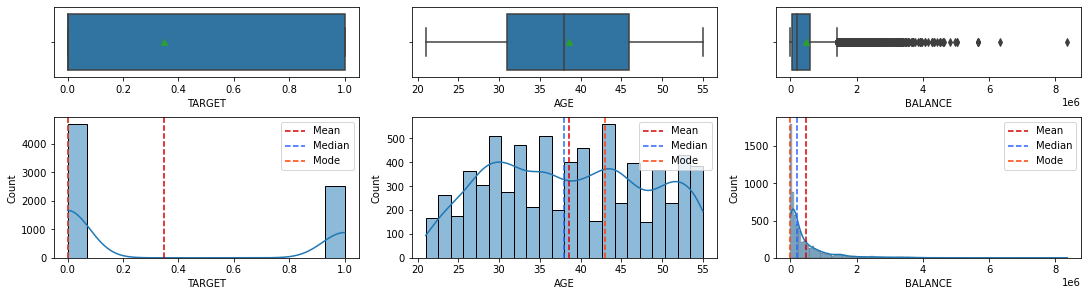

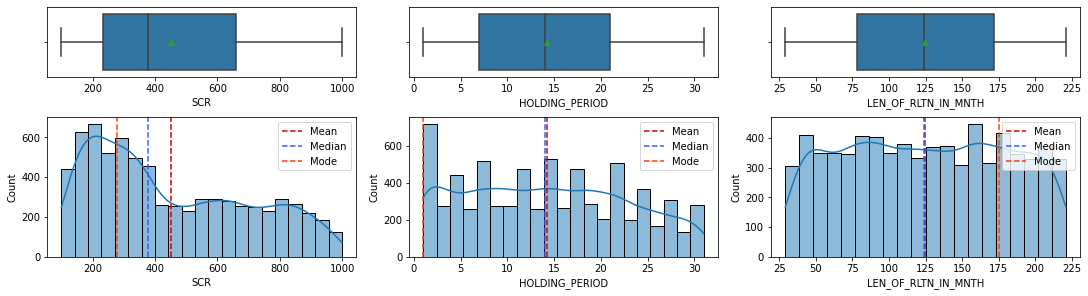

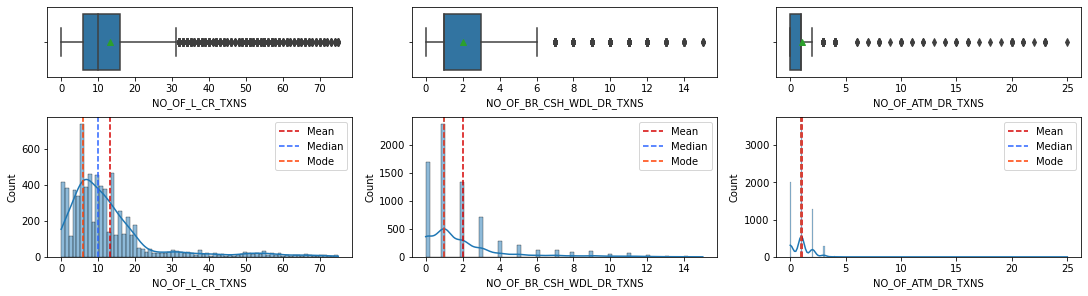

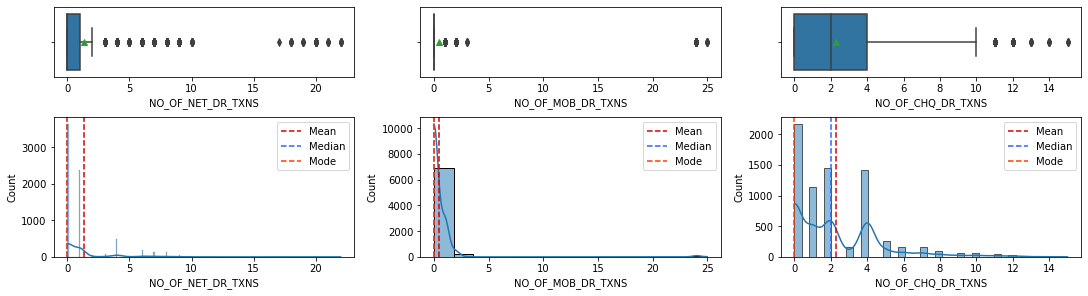

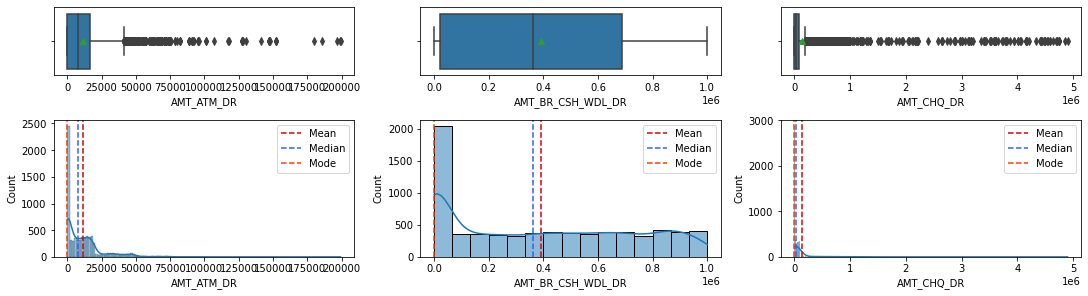

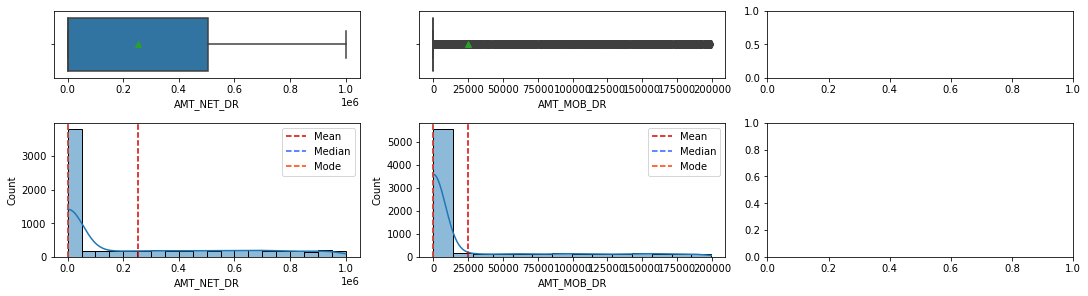

In [19]:
PlotHistBoxGrid()

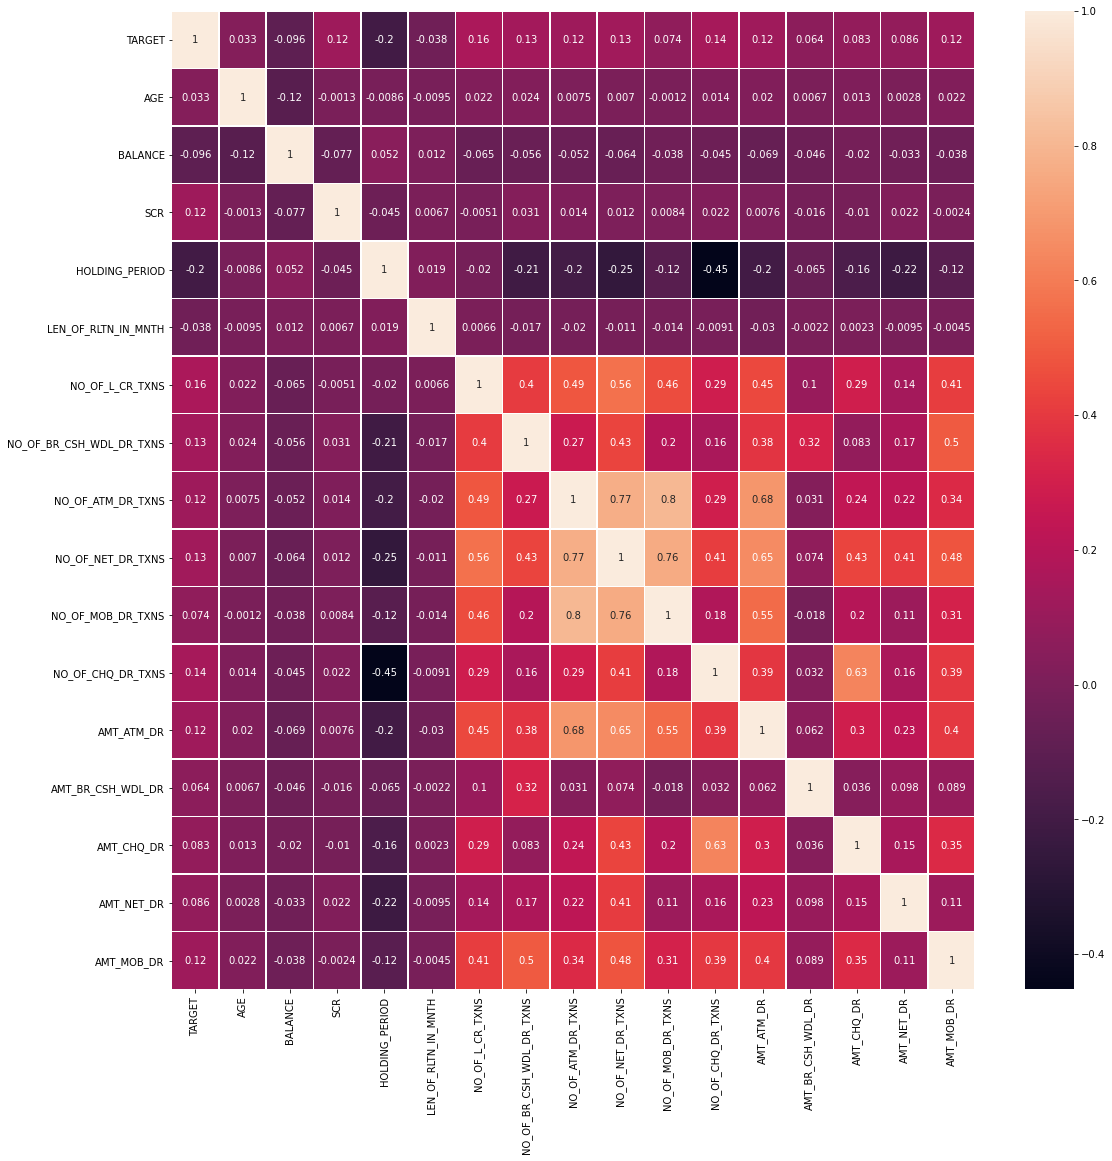

In [20]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Apply Log Scaling to Skewed data:
<ul>
    <li>
         Apply log scale + 1 to decrease the effect of the outliers and fix skewed data to ensure the output is positive. This applies to BALANCE, and NO_OF_CHQ_DR_TXNS. This improved the corrolation of BALANCE AND NO_OF_CHQ_DR_TXNS.
    </li>
    <li>
        Drop Original Columns.
    </li>
</ul>

In [21]:
main_data['BALANCE_log'] = (main_data['BALANCE'] + 1).transform(np.log)
main_data['NO_OF_CHQ_DR_TXNS_log'] = (main_data['NO_OF_CHQ_DR_TXNS'] + 1).transform(np.log)

main_data.drop([
    'BALANCE',
    'NO_OF_CHQ_DR_TXNS'
],
    axis=1,
    inplace=True)
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7223 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TARGET                    7223 non-null   int64         
 1   AGE                       7223 non-null   int64         
 2   GENDER                    7223 non-null   category      
 3   OCCUPATION                7223 non-null   category      
 4   SCR                       7223 non-null   int64         
 5   HOLDING_PERIOD            7223 non-null   int64         
 6   ACC_TYPE                  7223 non-null   category      
 7   ACC_OP_DATE               7223 non-null   datetime64[ns]
 8   LEN_OF_RLTN_IN_MNTH       7223 non-null   int64         
 9   NO_OF_L_CR_TXNS           7223 non-null   int64         
 10  NO_OF_BR_CSH_WDL_DR_TXNS  7223 non-null   int64         
 11  NO_OF_ATM_DR_TXNS         7223 non-null   int64         
 12  NO_OF_NET_DR_TXNS  

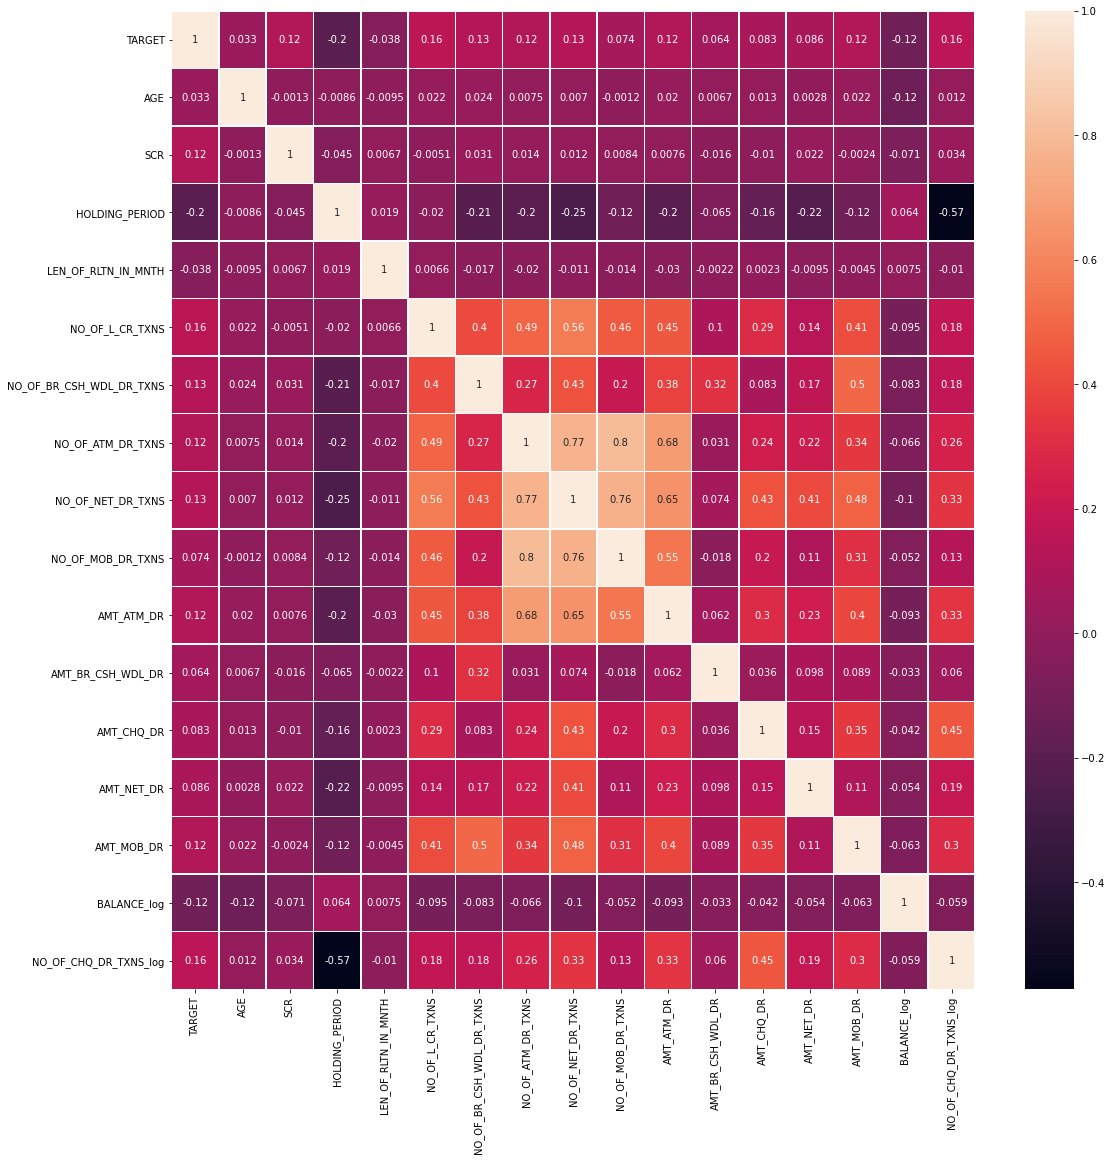

In [22]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

['TARGET', 'AGE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'BALANCE_log', 'NO_OF_CHQ_DR_TXNS_log']


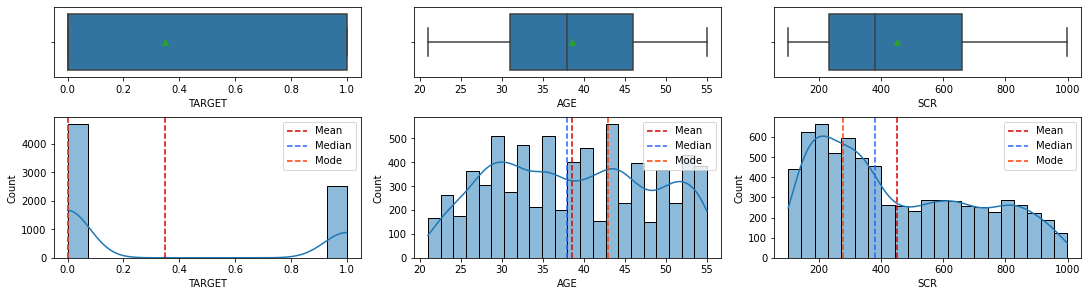

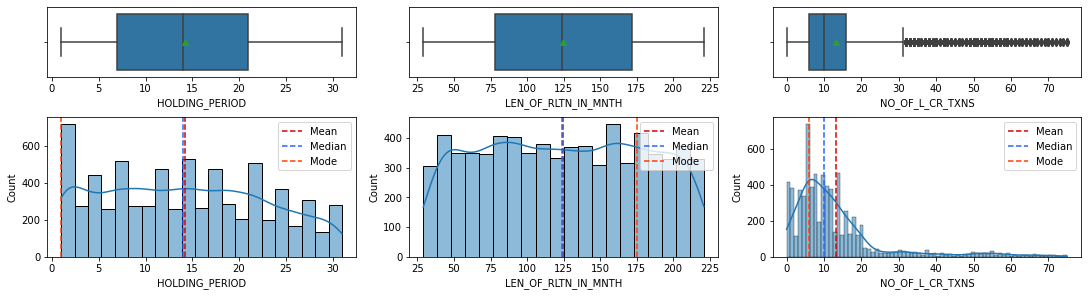

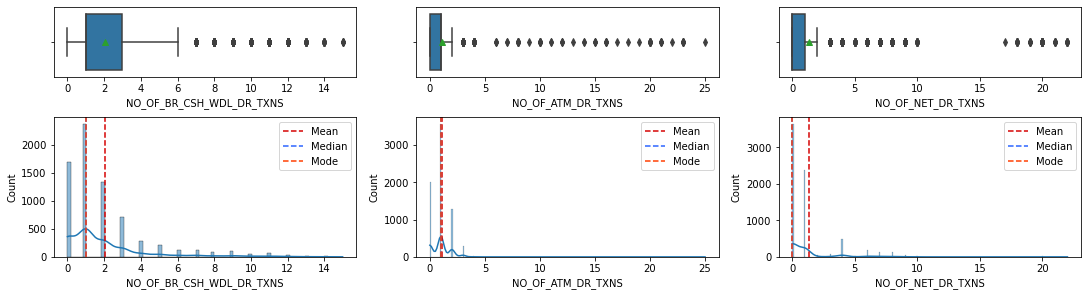

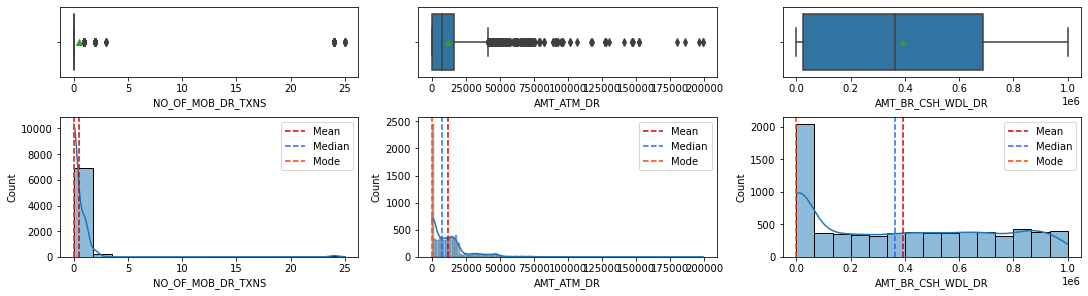

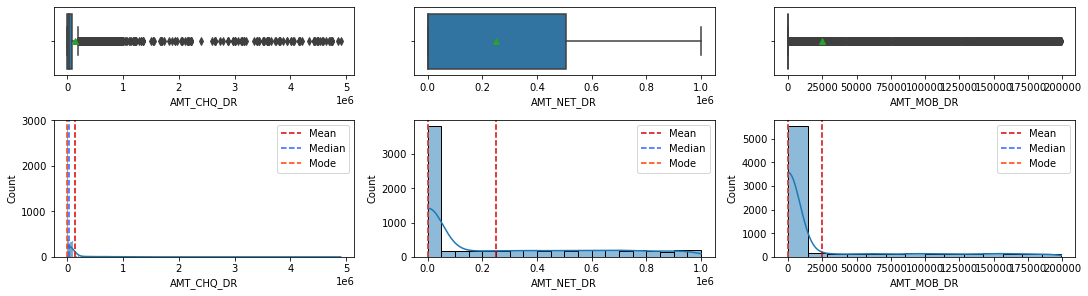

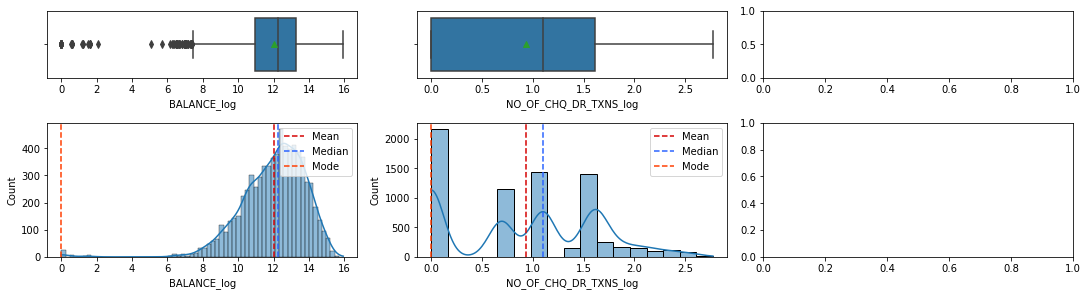

In [23]:
PlotHistBoxGrid()

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Outlier Treatment:
<ul>
    <li>
         Tried Outlier treatment, replacing outliers (4 times from the upper sand lower quatiles) and it did not help improve th corrolation
    </li>
</ul>

In [24]:
previous_corr = [main_data.corr()[['TARGET']]]
col_names = main_data.select_dtypes(include=['float', 'int64']).columns.tolist()

main_data_copy = main_data.copy()
for col_name in col_names:
    print(f"\n\n==========================={col_name}====================\n")
    main_data[col_name] = np.where(
        main_data_copy[col_name] < Get_IQR(col_name)[0],
        main_data_copy[col_name].mode(),
        main_data_copy[col_name])
    
previous_corr.append(main_data_copy.corr()[['TARGET']])



===========================TARGET====================

Q1 = 0.0, Q3 = 1.0, 4*IQR = 4.0
<PandasArray>
[]
Length: 0, dtype: int64


===========================AGE====================

Q1 = 29.0, Q3 = 46.0, 4*IQR = 68.0
<PandasArray>
[]
Length: 0, dtype: int64


===========================SCR====================

Q1 = 212.0, Q3 = 659.0, 4*IQR = 1788.0
<PandasArray>
[]
Length: 0, dtype: int64


===========================HOLDING_PERIOD====================

Q1 = 6.0, Q3 = 21.0, 4*IQR = 60.0
<PandasArray>
[]
Length: 0, dtype: int64


===========================LEN_OF_RLTN_IN_MNTH====================

Q1 = 69.0, Q3 = 172.0, 4*IQR = 412.0
<PandasArray>
[]
Length: 0, dtype: int64


===========================NO_OF_L_CR_TXNS====================

Q1 = 5.0, Q3 = 16.0, 4*IQR = 44.0
<PandasArray>
[58, 72, 55, 60, 63, 57, 68, 65, 67, 73,
 ...
 66, 59, 67, 55, 64, 75, 60, 61, 58, 55]
Length: 225, dtype: int64


===========================NO_OF_BR_CSH_WDL_DR_TXNS====================

Q1 = 0.0, Q3 = 3

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Comapare corrolation results:
<ul>
    <li>
         Comparing results of the outlier treatment method.
    </li>
    <li>
         Some features dropped in corrolation scores
    </li>
</ul>

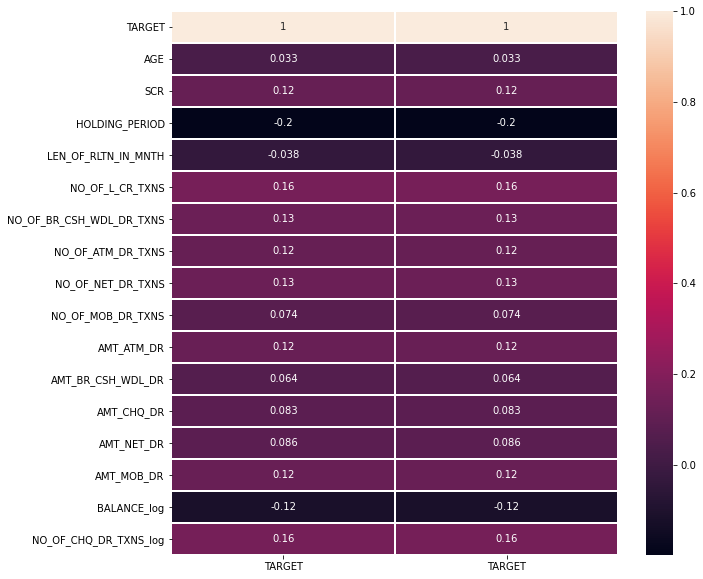

In [25]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data=pd.concat(previous_corr, axis=1), annot=True, linewidths=.5, ax=ax)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> One Hot Enconding and new Feature Engineering:
<ul>
    <li>
         Encode categorial variables into integers features dropping the first feature.
    </li>
    <li>
         Add new features from the 'ACC_OP_DATE' feature, added ACC_OP_DATE_YEAR, ACC_OP_DATE_MONTH , ACC_OP_DATE_DAYNAME, ACC_OP_DATE_AGE_IN_MONTHS (to check if customers have a tendenacy to open accounts (buy insurance) on a particular month or, day of the week or if they have been with the bank for a certain number of months)
    </li>
    <li>
        The countplot charts shows a very low variation in the data. Theres no relationship bewtween, day of the month, day of the week or the length of the relationship to customers puchasing.
     </li>
</ul>

In [26]:
oneHotCols = main_data.select_dtypes(include=['category']).columns.tolist()
main_data = pd.get_dummies(main_data, columns=oneHotCols, drop_first=True)

main_data.head(10)

,TARGET,AGE,SCR,HOLDING_PERIOD,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,...,GENDER_M,GENDER_O,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA,FLG_HAS_CC_1,FLG_HAS_ANY_CHGS_1,FLG_HAS_NOMINEE_1,FLG_HAS_OLD_LOAN_1
0,0,43,776,30,2005-03-23,146,7,0,1,2,...,1,0,0,1,0,1,0,0,1,1
1,0,47,324,28,2008-10-11,104,8,0,1,1,...,1,0,1,0,0,1,0,1,1,0
2,0,40,603,1,2012-04-26,175,10,1,1,1,...,1,0,0,1,0,1,0,1,1,1
3,0,53,277,13,2008-07-04,107,36,4,2,3,...,1,0,1,0,0,0,0,0,1,0
4,0,36,277,24,2001-12-29,185,20,1,0,0,...,1,0,0,0,0,1,0,0,1,0
6,0,30,479,14,2002-08-25,177,6,0,1,1,...,1,0,0,0,0,1,0,1,0,1
7,0,53,562,25,2009-03-15,99,14,3,0,0,...,0,0,1,0,0,0,0,0,1,1
8,0,42,277,15,2010-02-08,88,18,6,2,4,...,0,0,0,1,0,1,1,0,1,1
10,0,52,395,7,2004-01-26,160,7,1,1,1,...,1,0,0,1,0,1,0,0,1,1
11,0,43,277,24,2002-03-06,183,6,2,1,0,...,1,0,0,0,0,0,1,0,1,0


In [27]:
type(main_data['ACC_OP_DATE'].to_list()[0])

main_data['ACC_OP_DATE_MONTH']     = main_data['ACC_OP_DATE'].dt.month
main_data['ACC_OP_DATE_DAYNAME']   = main_data['ACC_OP_DATE'].dt.day_name()
main_data['ACC_OP_DATE_AGE_IN_MONTHS']       = (datetime.today().year - main_data['ACC_OP_DATE'].dt.year) * 12 + datetime.today().month - main_data['ACC_OP_DATE'].dt.month 

main_data.drop(['ACC_OP_DATE'], axis=1, inplace=True)
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7223 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TARGET                     7223 non-null   int64  
 1   AGE                        7223 non-null   int64  
 2   SCR                        7223 non-null   int64  
 3   HOLDING_PERIOD             7223 non-null   int64  
 4   LEN_OF_RLTN_IN_MNTH        7223 non-null   int64  
 5   NO_OF_L_CR_TXNS            7223 non-null   int64  
 6   NO_OF_BR_CSH_WDL_DR_TXNS   7223 non-null   int64  
 7   NO_OF_ATM_DR_TXNS          7223 non-null   int64  
 8   NO_OF_NET_DR_TXNS          7223 non-null   int64  
 9   NO_OF_MOB_DR_TXNS          7223 non-null   int64  
 10  AMT_ATM_DR                 7223 non-null   int64  
 11  AMT_BR_CSH_WDL_DR          7223 non-null   int64  
 12  AMT_CHQ_DR                 7223 non-null   int64  
 13  AMT_NET_DR                 7223 non-null   floa

In [28]:
day_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3, 
    'Thursday': 4, 
    'Friday': 5,
    'Saturday': 6, 
    'Sunday': 7, 
}
main_data['ACC_OP_DATE_DAYNUM'] = main_data['ACC_OP_DATE_DAYNAME'].replace(day_map)
main_data.drop(['ACC_OP_DATE_DAYNAME'], axis=1, inplace=True)
main_data['ACC_OP_DATE_DAYNUM']
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7223 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TARGET                     7223 non-null   int64  
 1   AGE                        7223 non-null   int64  
 2   SCR                        7223 non-null   int64  
 3   HOLDING_PERIOD             7223 non-null   int64  
 4   LEN_OF_RLTN_IN_MNTH        7223 non-null   int64  
 5   NO_OF_L_CR_TXNS            7223 non-null   int64  
 6   NO_OF_BR_CSH_WDL_DR_TXNS   7223 non-null   int64  
 7   NO_OF_ATM_DR_TXNS          7223 non-null   int64  
 8   NO_OF_NET_DR_TXNS          7223 non-null   int64  
 9   NO_OF_MOB_DR_TXNS          7223 non-null   int64  
 10  AMT_ATM_DR                 7223 non-null   int64  
 11  AMT_BR_CSH_WDL_DR          7223 non-null   int64  
 12  AMT_CHQ_DR                 7223 non-null   int64  
 13  AMT_NET_DR                 7223 non-null   floa

In [29]:
categorial_data_column_names = ['ACC_OP_DATE_MONTH', 'ACC_OP_DATE_DAYNUM', 'ACC_OP_DATE_AGE_IN_MONTHS']       # A list of categorial columns.
main_data[categorial_data_column_names].head(10)

,ACC_OP_DATE_MONTH,ACC_OP_DATE_DAYNUM,ACC_OP_DATE_AGE_IN_MONTHS
0,3,3,203
1,10,6,160
2,4,4,118
3,7,5,163
4,12,6,242
6,8,7,234
7,3,7,155
8,2,1,144
10,1,1,217
11,3,3,239


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Feature Engineering:
<ul>
    <li>
        The countplot charts shows a very low variation in the data. Theres no relationship bewtween, day of the month, day of the week or the length of the relationship to customers puchasing.
     </li>
    <li>
        These new features will be dropped.
    </li>
</ul>

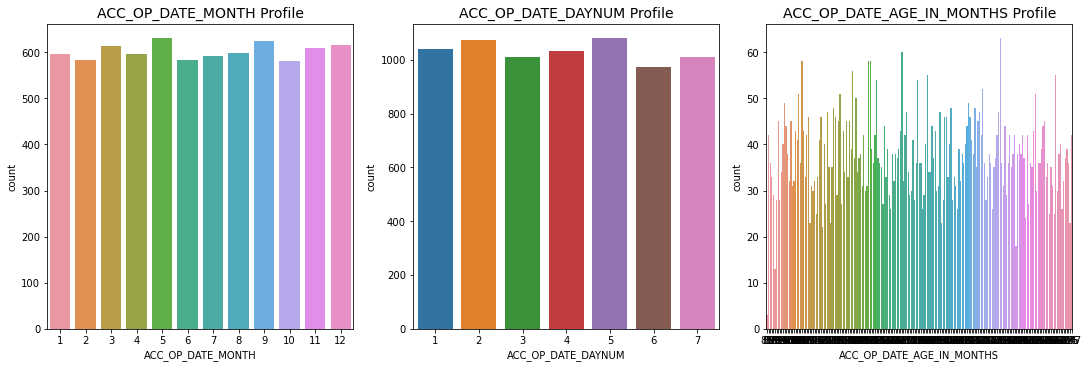

In [30]:
fig, axs = plt.subplots(
    nrows=1,                                                                # Number of rows of the grid
    ncols=3,                                                                # Number of columns of the grid.
    figsize=(15,5),                                                         # The size each figure
    constrained_layout=True)                                                # To avoid overlap between values

'''
Input:
axis, column/feature name

Output:
display a counplot for number of product purchses for specific values on that feature.

Retunrs:
N/A
''' 
def plot_cartegorial_charts(ax, df_column_name):                            
    ax = sns.countplot(                                                     
        data=main_data[main_data['TARGET'] == 1], 
        x=main_data[df_column_name],
        ax=ax)                                                              
    ax.set_title(df_column_name + ' Profile', fontsize=14)                  

    
column_names_index = 0;

for ax in axs.flat:
    plot_cartegorial_charts(ax, categorial_data_column_names[column_names_index])
    column_names_index = column_names_index + 1

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Descrete Data Feature and Relationship to Product Purcahse:
<ul>
    <li>
        The countplot charts shows a very low variation in the data. Theres no relationship bewtween, day of the month, day of the week or the length of the relationship to customers puchasing.
     </li>
    <li>
        Lower number of transections seems to be corrolated to increased product purchases.
     </li>
    <li>
        Lower holding period also seems to be corrolated to increased product purchases.
    </li>
    <li>
        Also all the features created through onehot encoding show a corrolation.
    </li>
</ul>

['TARGET', 'AGE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'BALANCE_log', 'NO_OF_CHQ_DR_TXNS_log', 'GENDER_M', 'GENDER_O', 'OCCUPATION_SAL', 'OCCUPATION_SELF-EMP', 'OCCUPATION_SENP', 'ACC_TYPE_SA', 'FLG_HAS_CC_1', 'FLG_HAS_ANY_CHGS_1', 'FLG_HAS_NOMINEE_1', 'FLG_HAS_OLD_LOAN_1', 'ACC_OP_DATE_MONTH', 'ACC_OP_DATE_AGE_IN_MONTHS', 'ACC_OP_DATE_DAYNUM']


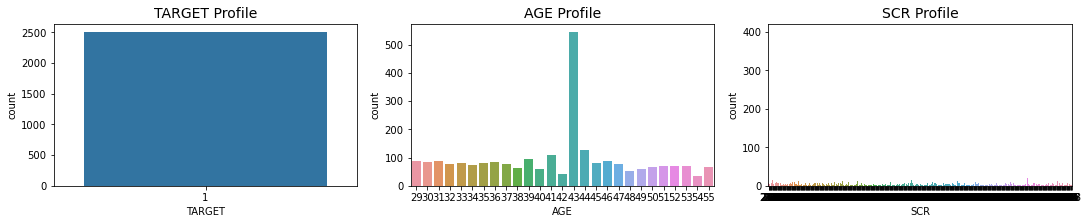

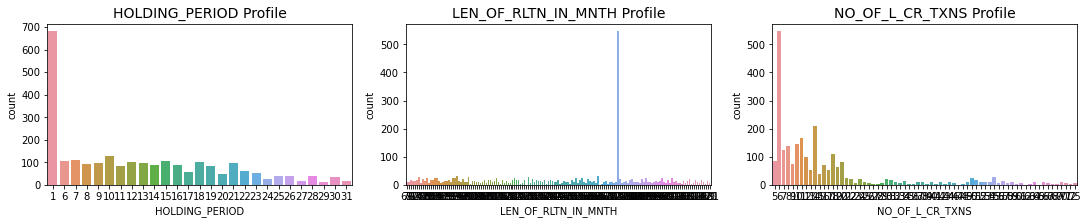

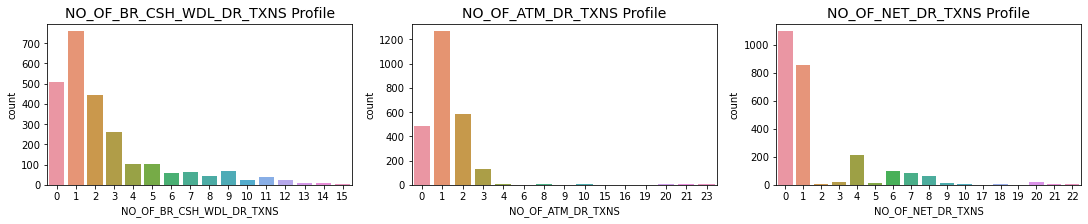

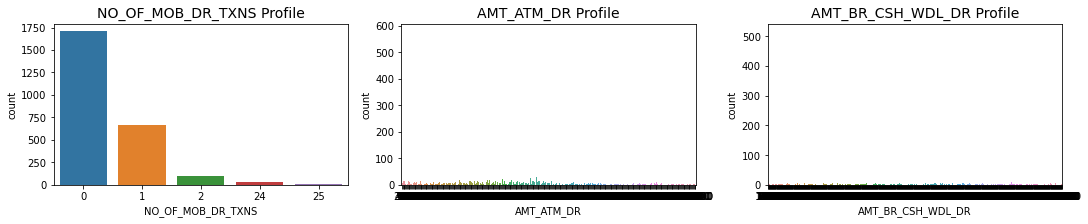

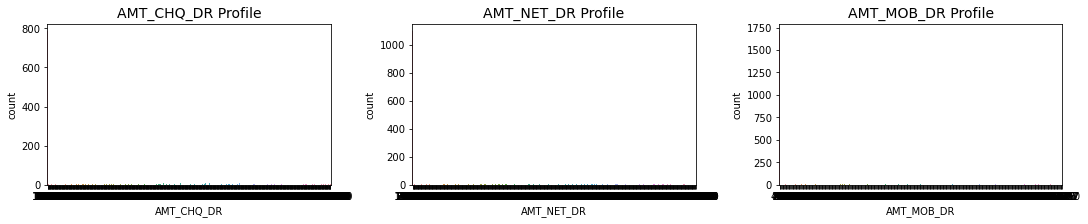

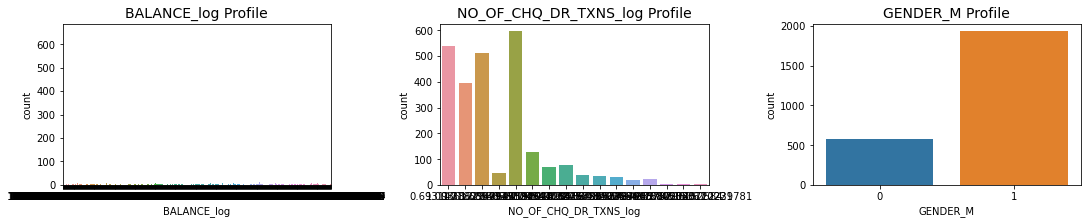

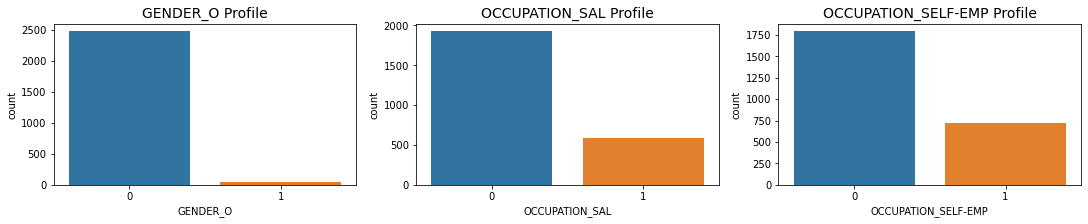

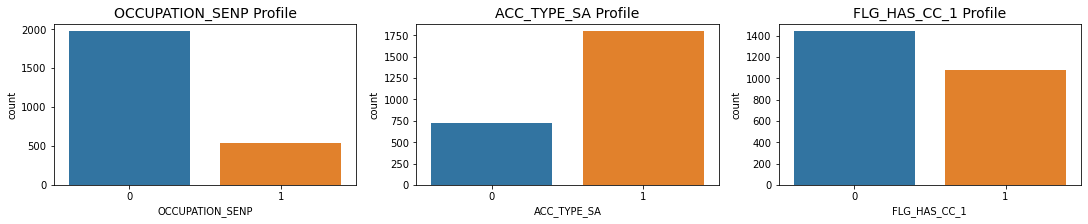

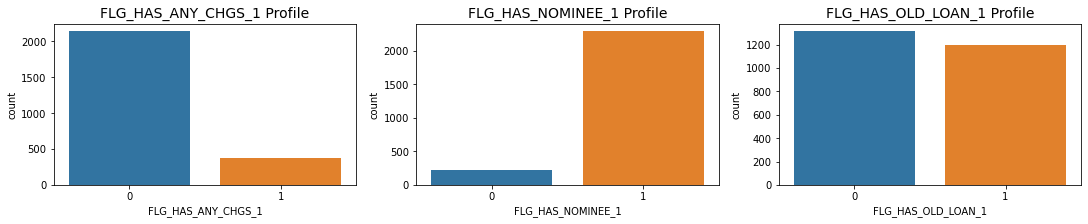

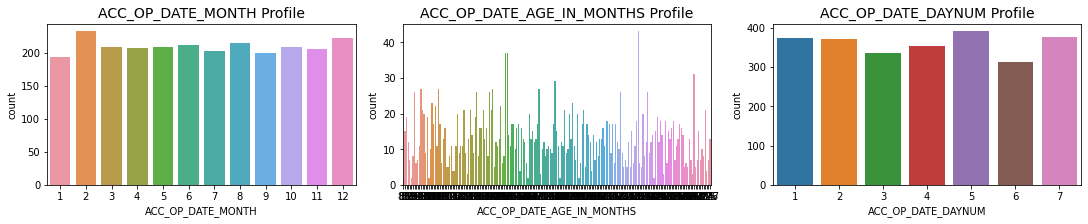

In [31]:
'''
Input:
axis, column/feature name

Output:
display a counplot for number of product purchses for specific values on that feature.

Retunrs:
N/A
''' 
def plot_cartegorial_charts(ax, df_column_name):                                     
    ax = sns.countplot(                                                   
        x=df_column_name,                                                   
        data=main_data[main_data['TARGET'] == 1], # select on rows that led to product purchase                                                   
        ax = ax)                                                        

    ax.set_xlabel(df_column_name)                                                                               
    ax.set_title(df_column_name + ' Profile', fontsize=14)                  


'''
Input:
N/A

Output:
Goes through all the features and displasy a counplot for number of product purchses for specific values on that feature.

Retunrs:
N/A
''' 
def PlotCountPlotGrid():
    col_names = main_data.columns.tolist()
    print(col_names)

    col_index = 0
    for r in range(0, int(len(col_names)), 3):
        fig, box = plt.subplots(
            nrows=1,
            ncols=3, 
            figsize=(15,3),
            constrained_layout=True)

        for index in range(0, 3):
            if col_index < int(len(col_names)):
                plot_cartegorial_charts(box.flat[index], col_names[col_index])
            col_index += 1
            
PlotCountPlotGrid()

['TARGET', 'AGE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'BALANCE_log', 'NO_OF_CHQ_DR_TXNS_log', 'ACC_OP_DATE_MONTH', 'ACC_OP_DATE_AGE_IN_MONTHS', 'ACC_OP_DATE_DAYNUM']


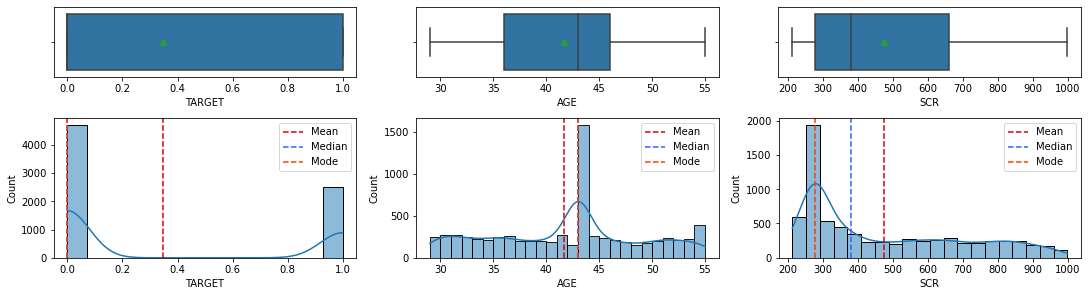

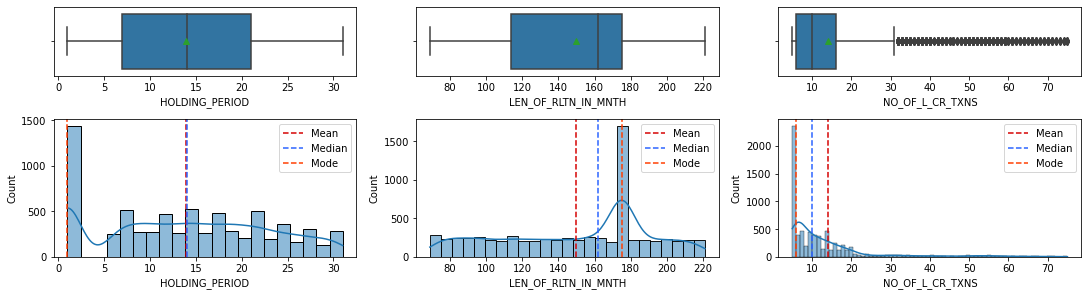

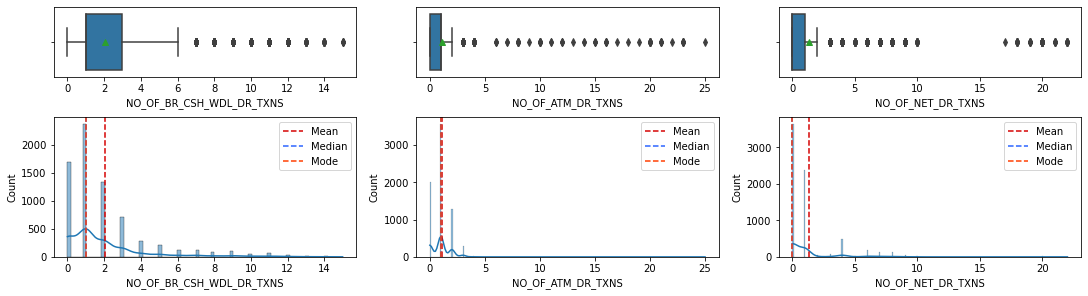

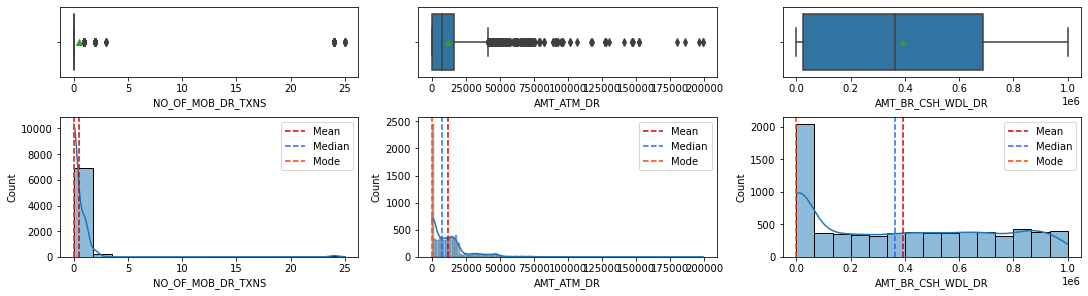

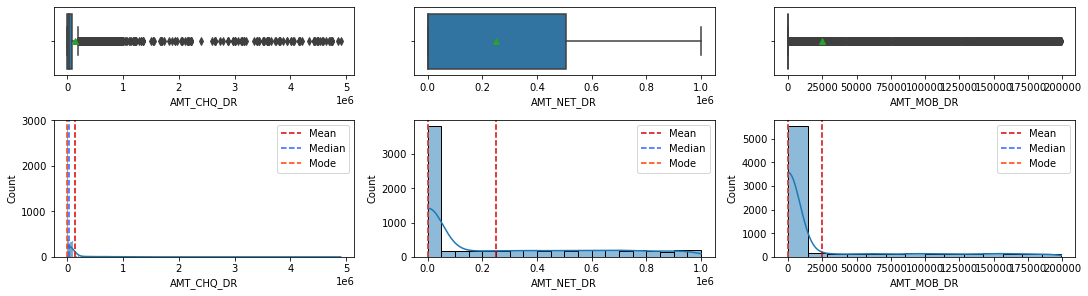

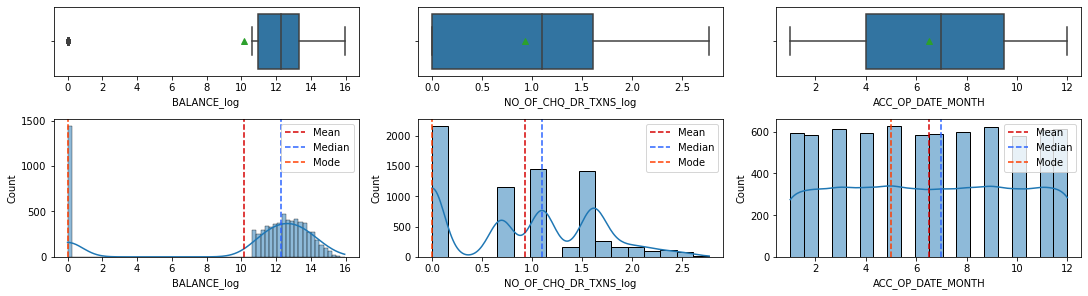

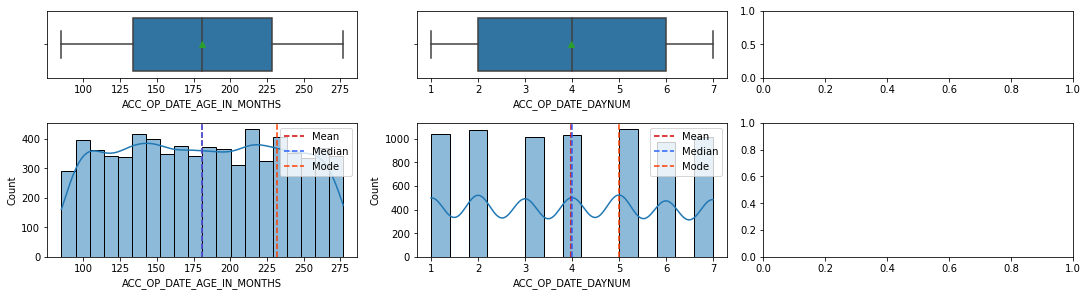

In [32]:
PlotHistBoxGrid()

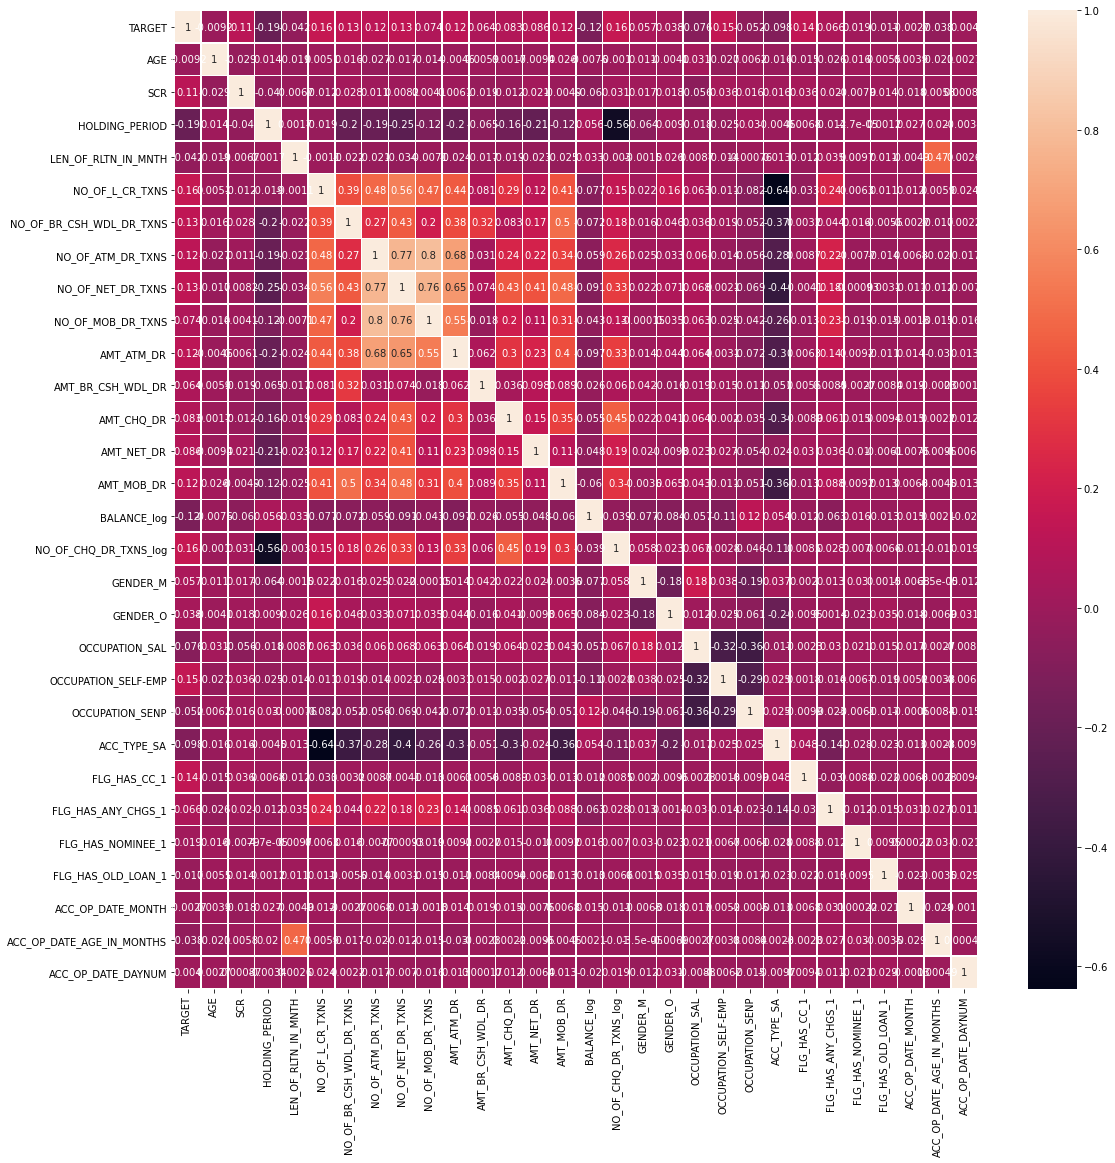

In [33]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [34]:
main_data.corr()[abs(main_data.corr()['TARGET']) < 0.05]

,TARGET,AGE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,...,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA,FLG_HAS_CC_1,FLG_HAS_ANY_CHGS_1,FLG_HAS_NOMINEE_1,FLG_HAS_OLD_LOAN_1,ACC_OP_DATE_MONTH,ACC_OP_DATE_AGE_IN_MONTHS,ACC_OP_DATE_DAYNUM
AGE,-0.009223,1.000000,-0.029402,0.013523,-0.018698,0.005099,0.015904,-0.027290,-0.016679,-0.014019,...,-0.027127,0.006164,-0.016268,-0.014591,-0.025913,0.015852,0.005460,0.003891,-0.020545,0.002734
LEN_OF_RLTN_IN_MNTH,-0.041794,-0.018698,-0.006686,0.001693,1.000000,-0.001055,-0.021999,-0.021472,-0.034341,-0.007068,...,-0.013797,-0.000761,0.012905,-0.011855,0.035218,0.009722,0.010737,-0.004907,0.473340,0.002585
GENDER_O,0.038179,-0.004135,0.018311,0.009005,0.026286,0.156378,0.046234,0.032514,0.071129,0.035202,...,-0.024988,-0.060924,-0.195260,-0.009468,0.001352,-0.022695,0.035103,-0.017569,-0.006944,0.030654
FLG_HAS_NOMINEE_1,0.019112,0.015852,-0.007890,-0.000047,0.009722,0.006320,0.015547,-0.007666,-0.000926,-0.018605,...,0.006726,-0.006132,-0.027974,0.008756,-0.011675,1.000000,0.009486,0.000225,0.030413,-0.020522
FLG_HAS_OLD_LOAN_1,-0.017296,0.005460,0.013985,0.001182,0.010737,0.010725,-0.005594,-0.013546,0.003095,-0.015268,...,-0.019480,-0.016632,-0.022605,-0.021923,-0.015369,0.009486,1.000000,-0.021037,-0.003534,0.029263
ACC_OP_DATE_MONTH,-0.002745,0.003891,-0.018120,0.027016,-0.004907,0.012051,-0.002720,0.006753,-0.011249,-0.001342,...,0.005159,-0.000500,-0.013417,0.006846,0.030880,0.000225,-0.021037,1.000000,-0.028531,-0.001258
ACC_OP_DATE_AGE_IN_MONTHS,-0.038102,-0.020545,0.005769,0.019832,0.473340,0.005860,-0.017459,-0.019942,-0.011621,-0.014547,...,0.003848,0.008427,0.002293,-0.002313,0.027237,0.030413,-0.003534,-0.028531,1.000000,0.000490
ACC_OP_DATE_DAYNUM,0.003966,0.002734,0.000867,-0.003369,0.002585,0.023907,0.002206,-0.017069,-0.007002,-0.016089,...,-0.006226,-0.014863,-0.009728,0.009409,0.011243,-0.020522,0.029263,-0.001258,0.000490,1.000000


In [35]:
main_data.corr()[abs(main_data.corr()['TARGET']) < 0.05].index.to_list()

['AGE',
 'LEN_OF_RLTN_IN_MNTH',
 'GENDER_O',
 'FLG_HAS_NOMINEE_1',
 'FLG_HAS_OLD_LOAN_1',
 'ACC_OP_DATE_MONTH',
 'ACC_OP_DATE_AGE_IN_MONTHS',
 'ACC_OP_DATE_DAYNUM']

In [36]:
# drop features with corrolation of less than 0.05 to the tagert variable
list_of_features_to_drop = main_data.corr()[abs(main_data.corr()['TARGET']) < 0.05].index.to_list()
main_data.drop(list_of_features_to_drop, axis=1, inplace=True)
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7223 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TARGET                    7223 non-null   int64  
 1   SCR                       7223 non-null   int64  
 2   HOLDING_PERIOD            7223 non-null   int64  
 3   NO_OF_L_CR_TXNS           7223 non-null   int64  
 4   NO_OF_BR_CSH_WDL_DR_TXNS  7223 non-null   int64  
 5   NO_OF_ATM_DR_TXNS         7223 non-null   int64  
 6   NO_OF_NET_DR_TXNS         7223 non-null   int64  
 7   NO_OF_MOB_DR_TXNS         7223 non-null   int64  
 8   AMT_ATM_DR                7223 non-null   int64  
 9   AMT_BR_CSH_WDL_DR         7223 non-null   int64  
 10  AMT_CHQ_DR                7223 non-null   int64  
 11  AMT_NET_DR                7223 non-null   float64
 12  AMT_MOB_DR                7223 non-null   int64  
 13  BALANCE_log               7223 non-null   float64
 14  NO_OF_C

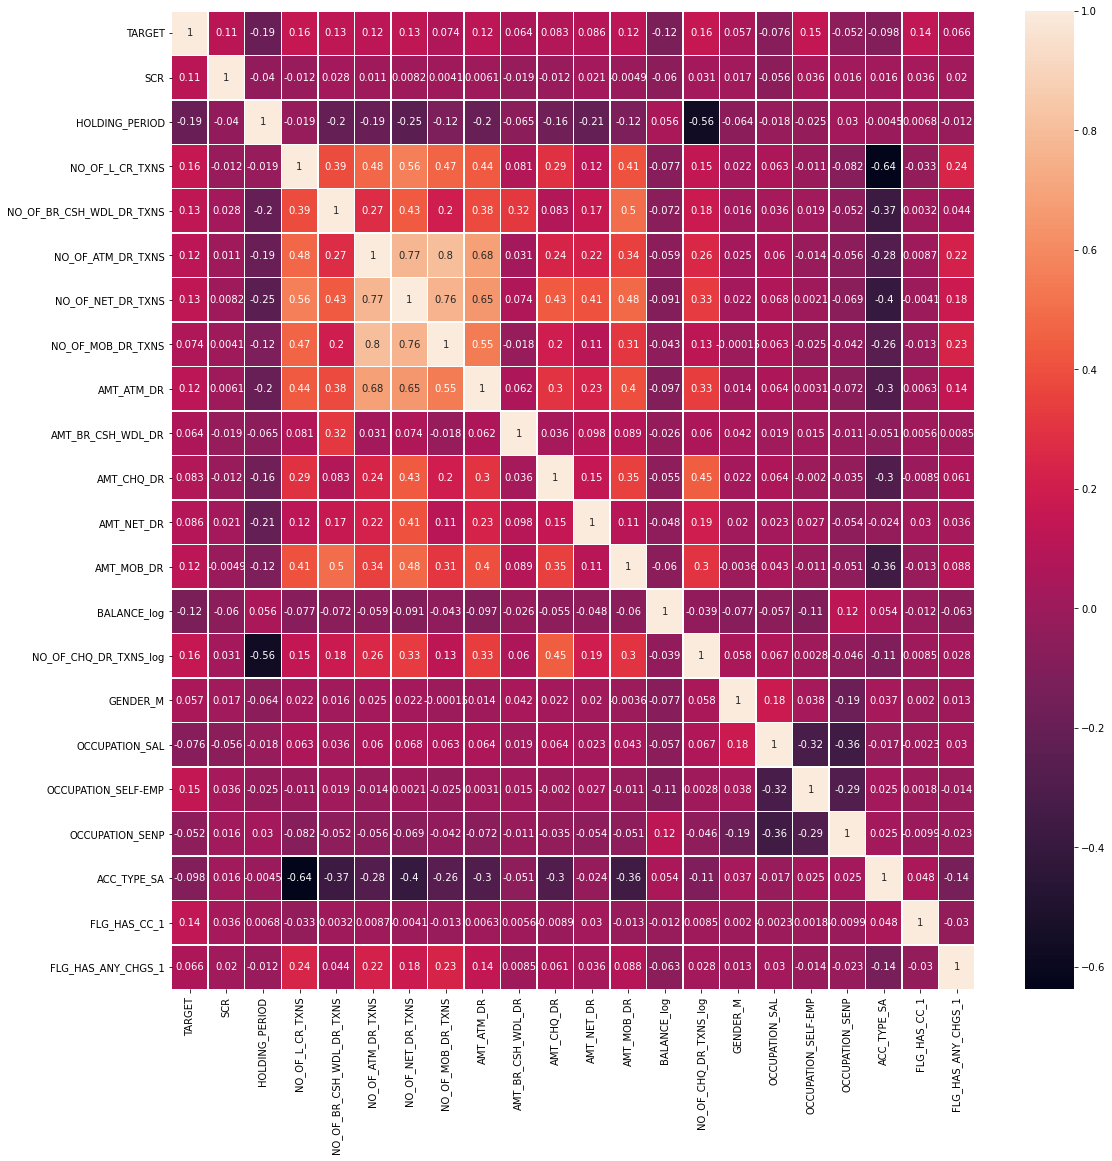

In [37]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

['TARGET', 'SCR', 'HOLDING_PERIOD', 'NO_OF_L_CR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'BALANCE_log', 'NO_OF_CHQ_DR_TXNS_log']


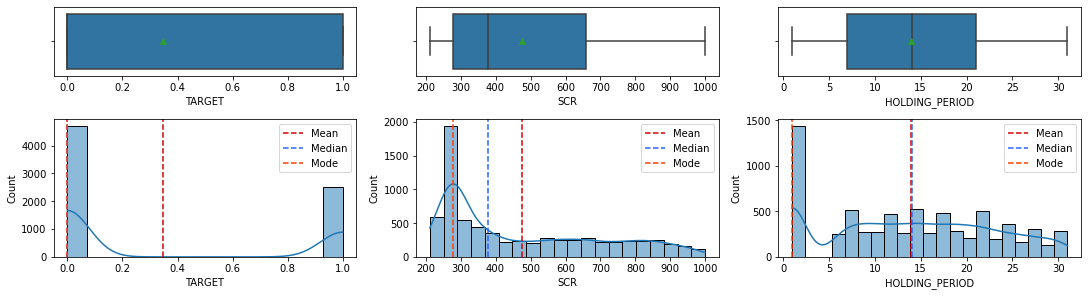

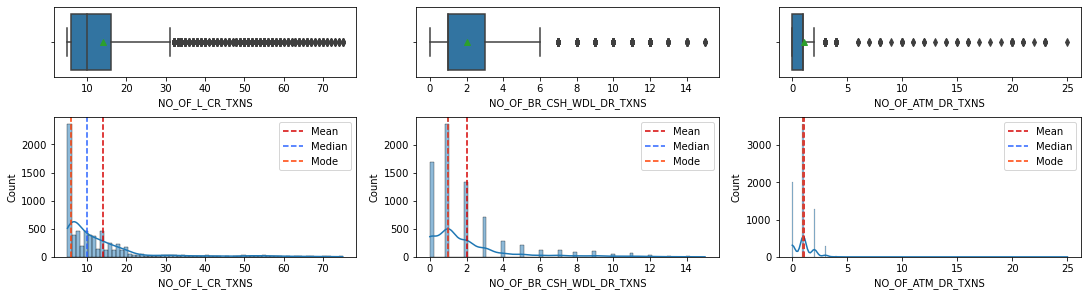

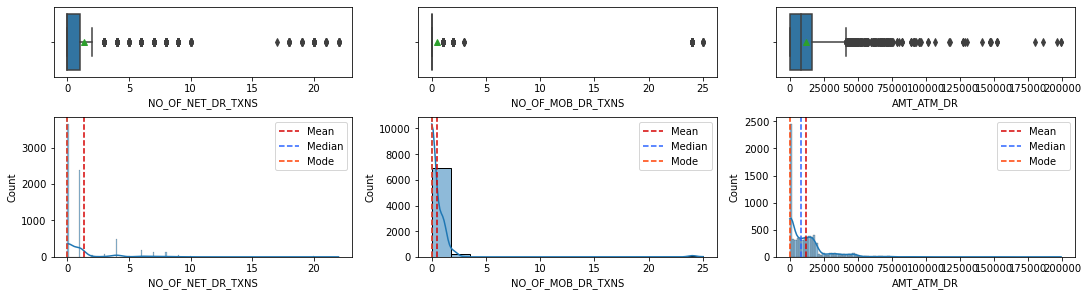

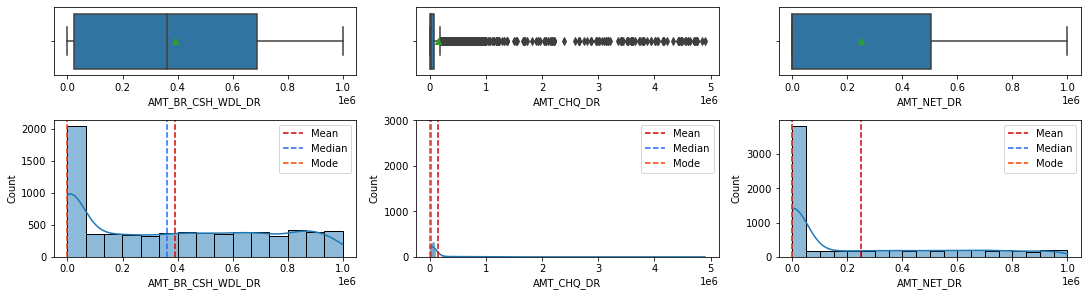

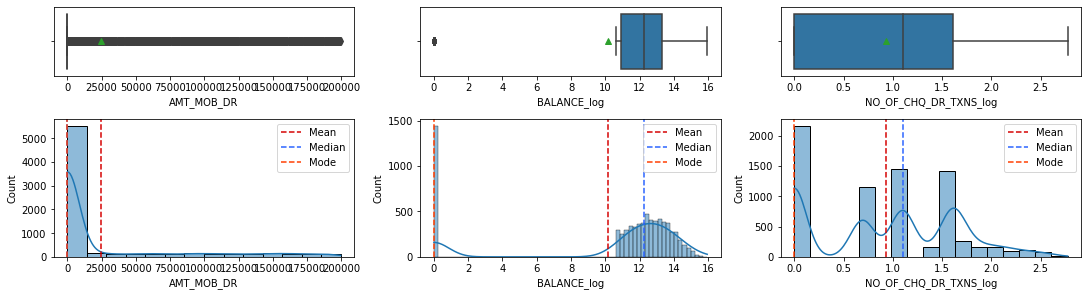

In [38]:
PlotHistBoxGrid()

In [ ]:
sns.pairplot(main_data, kind="reg", hue="TARGET")

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 3. Building Decision Tree Model and Analysis:

In [ ]:
X = main_data.drop("TARGET", axis=1)
Y = main_data.pop("TARGET")
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

In [ ]:
feature_names = list(X.columns)
print(feature_names)

In [ ]:
# Functions to calculate different metrics

def DisplayConfusionMatrix(model, y_actual, labels=[1,0]):
    y_predict = model.predict(x_test)
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    confusion_matix_df = pd.DataFrame(
        confusion_matrix,
        index   = [i for i in ["Actual No", "Actual Yes"]],
        columns = [i for i in ["Predicted - No", "Predicted - Yes"]])
    
    group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    group_percetages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percetages)]
    labels = np.array(labels).reshape(2, 2)
    plt.figure(figsize= (10,7))
    sns.heatmap(confusion_matix_df, annot=labels,fmt='')
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
def GetMetricsScore(model):
    
    pred_train = model.predict(x_train)
    pred_test  = model.predict(x_test)
    
    train_accuracy = model.score(x_train, y_train)
    test_accuracy  = model.score(x_test, y_test)
    
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall  = metrics.recall_score(y_test, pred_test)
    
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision  = metrics.precision_score(y_test, pred_test)

    f1_score_train = 2 * ((train_precision * train_recall)/(train_precision + train_recall))
    f1_score_test = 2 * ((test_precision * test_recall)/(test_precision + test_recall))
    
    return {
        'Accuracy_Test'   : test_accuracy,
        'Accuracy_Train'  : train_accuracy,
        'Recall_Test'     : test_recall,
        'Recall_Train'    : train_recall,
        'Precision_Test'  : test_precision,
        'Precision_Train' : train_precision,
        'F1_Score_Train'  : f1_score_train,
        'F1_Score_Test'   : f1_score_test
    }
        

def DisplayImportance(model):
    gini_importances = pd.DataFrame(model.feature_importances_, columns=["Imp"], index=x_train.columns).sort_values(by = "Imp")
    print(gini_importances)
    
def DisplayImportanceChart(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [list(X.columns)[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
def PlotTree(model, size = [20, 30]):
    plt.figure(figsize=(size[0],size[1]))
    tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True)
    plt.show()
    
def PrintCoeficients(model):
    coefs = pd.DataFrame(
        np.append(model.coef_, model.intercept_),
        index=x_train.columns.tolist() + ["Intercept"],
        columns=["Coefficients"],
    )

    coefs.sort_values('Coefficients')

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Decision Tree With Default Params:
<ul>
    <li>
        The model shows very high scores for the training data (100%). This is because the tree has fully grown and it is overfitted to the test data. However, the test data are not that bad too so it could work.
     </li>
</ul>

In [ ]:
dTree_Model = DecisionTreeClassifier(criterion= 'gini', random_state=1)
dTree_Model.fit(x_train, y_train)

In [ ]:
dTree_Model.get_params()

In [ ]:
PlotTree(dTree_Model)

In [ ]:
DisplayConfusionMatrix(dTree_Model, y_test)

In [ ]:
dTree_model_score = GetMetricsScore(dTree_Model)
pprint.pprint(dTree_model_score)

In [ ]:
DisplayImportanceChart(dTree_Model)

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> Decision Tree With Grid Search:
<ul>
    <li>
        The model shows very low score for the training and test data. This is becuase the tree has a very small depth and the data itself had very low corrolation with the target variable.
     </li>
    <li>
        The recall on this model is lower than on the first model, meaning that the first model is more likely to catch customers who will buy the product than this model will.
     </li>
</ul>

In [ ]:

# choose the type of classifier
dTree_Model = DecisionTreeClassifier(random_state=1, criterion= 'gini')

# Grid of params to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes" : [2, 3, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1]
}

# type of score used to compare paramter combinations
acc_scorer =metrics.make_scorer(metrics.recall_score)

# run the grid search
grid_obj = GridSearchCV(dTree_Model, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# set the clf to the best combination of parameters
dTree_Model = grid_obj.best_estimator_

# fit the best algorithm to the data
dTree_Model.fit(x_train, y_train)

In [ ]:
PlotTree(dTree_Model, [15, 10])

In [ ]:
dTree_model_score = GetMetricsScore(dTree_Model)
pprint.pprint(dTree_model_score)

In [ ]:
DisplayConfusionMatrix(dTree_Model, y_test)

In [ ]:
DisplayImportanceChart(dTree_Model)

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 4. Building Logistic Regression Model and Analysis:
    
<ul>
    <li>
        This model has the lowest recall score and will not be the best to use to predict customers who will purchase the product.
     </li>
    <li>
        The false negatives are high on this model, it is more likely to miss potential customers.
     </li>
</ul>

In [ ]:
# fit model on train
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(x_train,y_train)

# predict on test
y_predict = logistic_reg_model.predict(x_test)

In [ ]:
logistic_reg_model.get_params()

In [ ]:
logistic_reg_model_score = GetMetricsScore(logistic_reg_model)
pprint.pprint(logistic_reg_model_score)

In [ ]:
DisplayConfusionMatrix(logistic_reg_model, y_test)

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 5. Conclusions
    
<ul>
    <li>
        The data had very low corrolations with the target variable and it was very imbalanced toward no purchases. We needed more observations of insurance purchases to improve the accuracy of the models.
     </li>
    <li>
        The Decision tree with default paramaters had very high scores but it was also verfitted to the training data, however, the mode also had very high scores for test data. The other models had very low scores for recall and would perfom very bad on real world data as compared to the model with the default params.
     </li>
</ul>